### Task1: Convert the CityPop.csv file to a JSON file, save as CityPop.json.

In [1]:
#importing all necessary libraries
import os
import sys
import pandas as pd
import geopandas as gpd
import json

In [6]:
def change_os(path):                         #function to change current working directory
    print(os.getcwd())
    os.chdir(path)
    print(os.getcwd())

change_os(r'D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics')

D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics
D:\CourseWork_GIS_2022\Geog 573 - Geospatial Big data Analytics


In [29]:
try:                                        #Checks if CityPop.csv exists in the path and reads CSV into city_df
    if os.path.exists('CityPop.csv'):
        print('CityPop.csv exists in the directory>',os.getcwd())
        city_df = pd.read_csv('CityPop.csv')
        print('CityPop.csv is read successfully into DataFrame \n')
        print(city_df.head())
except:                                      #Handles the missing file
    print('CityPop.csv does not exists the directory>',os.getcwd())

In [17]:
headers = list(city_df.columns.values)
print(headers)

['id', 'latitude', 'longitude', 'city', 'label', 'yr1970', 'yr1975', 'yr1980', 'yr1985', 'yr1990', 'yr1995', 'yr2000', 'yr2005', 'yr2010']
id
latitude
longitude
city
label
yr1970
yr1975
yr1980
yr1985
yr1990
yr1995
yr2000
yr2005
yr2010


In [21]:
pop_list = []
for row in city_df.itertuples(index=True):
    city_dict = {}
    for header in headers:
        city_dict[header]=getattr(row,header)
    pop_list.append(city_dict)
    
print(pop_list)

[{'id': 1, 'latitude': 35.6832085, 'longitude': 139.8089447, 'city': 'Tokyo', 'label': 'Tokyo', 'yr1970': 23.3, 'yr1975': 26.61, 'yr1980': 28.55, 'yr1985': 30.3, 'yr1990': 32.53, 'yr1995': 33.59, 'yr2000': 34.45, 'yr2005': 35.62, 'yr2010': 36.67}, {'id': 2, 'latitude': 28.6082802, 'longitude': 77.2008133, 'city': 'New_Delhi', 'label': 'New Delhi', 'yr1970': 3.53, 'yr1975': 4.43, 'yr1980': 5.56, 'yr1985': 7.33, 'yr1990': 9.73, 'yr1995': 12.41, 'yr2000': 15.73, 'yr2005': 19.49, 'yr2010': 22.16}, {'id': 3, 'latitude': -23.5628395, 'longitude': -46.6546402, 'city': 'Sao_Paulo', 'label': 'Sao Paulo', 'yr1970': 7.62, 'yr1975': 9.61, 'yr1980': 12.09, 'yr1985': 13.39, 'yr1990': 14.78, 'yr1995': 15.95, 'yr2000': 17.1, 'yr2005': 18.65, 'yr2010': 20.26}, {'id': 4, 'latitude': 18.93013, 'longitude': 72.8300934, 'city': 'Mumbai', 'label': 'Mumbai', 'yr1970': 5.81, 'yr1975': 7.08, 'yr1980': 8.66, 'yr1985': 10.34, 'yr1990': 12.31, 'yr1995': 14.11, 'yr2000': 16.09, 'yr2005': 18.21, 'yr2010': 20.04}, {

In [31]:
def list2json(listvariable,newFile='CityPop'):
    json_data = json.dumps(listvariable)
    if os.path.exists(f'{newFile}.json'):
        os.remove(f'{newFile}.json')
        with open(f'{newFile}.json','w') as json_file:
            json_file.write(json_data)
        print(f'{newFile}.json is re-created')
        print('Type of file:',type(json_data))
    else:
        with open(f'{newFile}.json','w') as json_file:
            json_file.write(json_data)
        print(f'{newFile}.json is created')
        print('Type of file:',type(json_data))
        
list2json(pop_list)

CityPop.json is re-created
Type of file: <class 'str'>


### Task 2: Convert the CityPop.json file to a GeoJSON file, save as CityPop_geojson.json.

In [60]:
with open('CityPop.json','r') as json_file: #open CityPop.json and manipulate it to a Python Object ~ list
    city_data = json.load(json_file) #json.load() method converts from JSON to list
print(type(city_data))

<class 'list'>


In [66]:
#create an empty dictionary that depicts structure of geojson
geojson = {
    "type":"FeatureCollection",
    "features":[]
}

In [67]:
print(headers)

['id', 'latitude', 'longitude', 'city', 'label', 'yr1970', 'yr1975', 'yr1980', 'yr1985', 'yr1990', 'yr1995', 'yr2000', 'yr2005', 'yr2010']


In [68]:
#city initializes each dictionary key-value pairs from city_data list, which is a list of dictionaries

for city in city_data:
    city_feature = {
        "type":"Feature",
        "geometry":{
            "type":"Point",
            "coordinates":[city['longitude'],city['latitude']]
        },
        "properties":{
            "id":city["id"],
            "latitude":city["latitude"],
            "longitude":city["longitude"],
            "city":city["city"],
            "label":city["label"],
            "yr1970":city["yr1970"],
            "yr1975":city["yr1975"],
            "yr1980":city["yr1980"],
            "yr1985":city["yr1985"],
            "yr1990":city["yr1990"],
            "yr1995":city["yr1995"],
            "yr2000":city["yr2000"],
            "yr2010":city["yr2010"],
        }
    }
    
    geojson["features"].append(city_feature)
    
geojson = json.dumps(geojson) #creates JSON object format and loads into geojson

In [70]:
#writes geojson dictionary format into a JSON file
if os.path.exists('CityPop_geojson.json'):
    os.remove('CityPop_geojson.json')
    with open('CityPop_geojson.json','w') as json_file:
        json_file.write(geojson)
    print('File exists and CityPop_geojson.json is recreated !')
else:
    with open('CityPop_geojson.json','w') as json_file:
        json_file.write(geojson)
    print('CityPop_geojson.json is created !')

File exists and CityPop_geojson.json is recreated !


### Task3: Convert the CityPop_geojson.json file to a Shp file, save as CityPop.shp.

In [107]:
city_gdf=gpd.read_file('CityPop_geojson.json')
city_gdf.to_file('CityPop.shp', driver='ESRI Shapefile')

### Task 4: Load the CityPop.shp file and create a simple map with world map as basemap

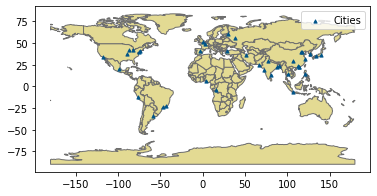

In [100]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color="#E3DA93", edgecolor="#6E6E6E")
city_gdf.plot(ax=base, marker='^', color="#005489", markersize=10, label='Cities')
base.legend()